In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

# Vanishing/Exploding Gradients Problem

### Xavier and He Initialization

In [3]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [4]:
keras.layers.Dense(10, activation="relu", kernel_initializer = "he_normal")

In [5]:
init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
                                         distribution="uniform")
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

# Nonsaturating Actiavtion functions

## Leaky Relu

In [6]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

[-5, 5, -0.5, 4.2]

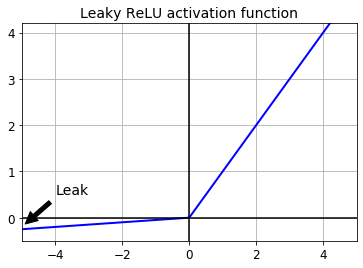

In [8]:
z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5,5], [0,0], 'k-')
plt.plot([0,0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

In [9]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [11]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [16]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 145us/sample - loss: 1.2806 - accuracy: 0.6250 - val_loss: 0.8883 - val_accuracy: 0.7152
Epoch 2/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.7954 - accuracy: 0.7373 - val_loss: 0.7135 - val_accuracy: 0.7648
Epoch 3/10
55000/55000 [==============================] - 6s 100us/sample - loss: 0.6816 - accuracy: 0.7726 - val_loss: 0.6356 - val_accuracy: 0.7882
Epoch 4/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.6215 - accuracy: 0.7935 - val_loss: 0.5922 - val_accuracy: 0.8010
Epoch 5/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.5830 - accuracy: 0.8082 - val_loss: 0.5596 - val_accuracy: 0.8172
Epoch 6/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5339 - val_accuracy: 0.8238
Epoch 7/10
55000/55000 [==============================

In [19]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 121us/sample - loss: 1.3470 - accuracy: 0.6225 - val_loss: 0.9268 - val_accuracy: 0.7200
Epoch 2/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.8208 - accuracy: 0.7357 - val_loss: 0.7322 - val_accuracy: 0.7640
Epoch 3/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.6972 - accuracy: 0.7697 - val_loss: 0.6494 - val_accuracy: 0.7868
Epoch 4/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.6332 - accuracy: 0.7904 - val_loss: 0.6027 - val_accuracy: 0.8024
Epoch 5/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.5918 - accuracy: 0.8051 - val_loss: 0.5675 - val_accuracy: 0.8140
Epoch 6/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.5619 - accuracy: 0.8140 - val_loss: 0.5393 - val_accuracy: 0.8252
Epoch 7/10
55000/55000 [==============================] 

### ELU

In [22]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z)-1), z)

[-5, 5, -2.2, 3.2]

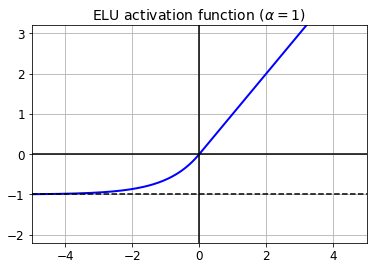

In [23]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

In [24]:
keras.layers.Dense(10, activation="elu")

## SELU

In [26]:
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [27]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

[-5, 5, -2.2, 3.2]

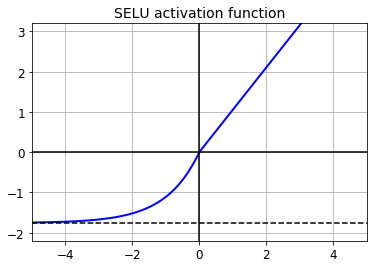

In [28]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

In [30]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 ==0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [31]:
keras.layers.Dense(10, activation="selu",
                  kernel_initializer="lecun_normal")

In [32]:
np.random.seed(42)
tf.random.set_seed(42)

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                            kernel_initializer="lecun_normal"))

for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [36]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [37]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                   validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 59s 1ms/sample - loss: 1.2024 - accuracy: 0.5257 - val_loss: 0.8042 - val_accuracy: 0.6852
Epoch 2/5
55000/55000 [==============================] - 47s 858us/sample - loss: 0.7471 - accuracy: 0.7260 - val_loss: 0.7028 - val_accuracy: 0.7434
Epoch 3/5
55000/55000 [==============================] - 48s 874us/sample - loss: 0.6669 - accuracy: 0.7623 - val_loss: 0.6307 - val_accuracy: 0.7784
Epoch 4/5
55000/55000 [==============================] - 48s 881us/sample - loss: 0.6131 - accuracy: 0.7817 - val_loss: 0.5904 - val_accuracy: 0.7948
Epoch 5/5
55000/55000 [==============================] - 47s 860us/sample - loss: 0.5621 - accuracy: 0.7992 - val_loss: 0.5708 - val_accuracy: 0.8052


In [38]:
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["accuracy"])

In [41]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                   validation_data = (X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 31s 569us/sample - loss: 1.8099 - accuracy: 0.2689 - val_loss: 1.2908 - val_accuracy: 0.4272
Epoch 2/5
55000/55000 [==============================] - 26s 473us/sample - loss: 1.1562 - accuracy: 0.5017 - val_loss: 0.9890 - val_accuracy: 0.5828
Epoch 3/5
55000/55000 [==============================] - 26s 467us/sample - loss: 1.0240 - accuracy: 0.5764 - val_loss: 0.9145 - val_accuracy: 0.6082
Epoch 4/5
55000/55000 [==============================] - 26s 468us/sample - loss: 0.9193 - accuracy: 0.6259 - val_loss: 0.7714 - val_accuracy: 0.6952
Epoch 5/5
55000/55000 [==============================] - 26s 466us/sample - loss: 0.8166 - accuracy: 0.6710 - val_loss: 0.7224 - val_accuracy: 0.7130


# Batch Normalization

In [42]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_213 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_214 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_215 (Dense)            (None, 10)               

In [44]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [45]:
# it also creates two operations
# that will be called by Keras at each iteration during training. These
# operations will update the moving averages.
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["accuracy"])

In [47]:
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 10s 189us/sample - loss: 0.8767 - accuracy: 0.7137 - val_loss: 0.5532 - val_accuracy: 0.8206
Epoch 2/10
55000/55000 [==============================] - 8s 147us/sample - loss: 0.5756 - accuracy: 0.8017 - val_loss: 0.4758 - val_accuracy: 0.8458
Epoch 3/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.5154 - accuracy: 0.8211 - val_loss: 0.4396 - val_accuracy: 0.8540
Epoch 4/10
55000/55000 [==============================] - 8s 147us/sample - loss: 0.4842 - accuracy: 0.8311 - val_loss: 0.4160 - val_accuracy: 0.8594
Epoch 5/10
55000/55000 [==============================] - 8s 142us/sample - loss: 0.4561 - accuracy: 0.8422 - val_loss: 0.4002 - val_accuracy: 0.8650
Epoch 6/10
55000/55000 [==============================] - 8s 142us/sample - loss: 0.4400 - accuracy: 0.8470 - val_loss: 0.3885 - val_accuracy: 0.8698
Epoch 7/10
55000/55000 [==========================

In [48]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [49]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [50]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 10s 178us/sample - loss: 1.0323 - accuracy: 0.6755 - val_loss: 0.6734 - val_accuracy: 0.7840
Epoch 2/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.6778 - accuracy: 0.7815 - val_loss: 0.5572 - val_accuracy: 0.8198
Epoch 3/10
55000/55000 [==============================] - 8s 150us/sample - loss: 0.5924 - accuracy: 0.8050 - val_loss: 0.5003 - val_accuracy: 0.8346
Epoch 4/10
55000/55000 [==============================] - 9s 168us/sample - loss: 0.5449 - accuracy: 0.8167 - val_loss: 0.4668 - val_accuracy: 0.8434
Epoch 5/10
55000/55000 [==============================] - 9s 163us/sample - loss: 0.5117 - accuracy: 0.8268 - val_loss: 0.4431 - val_accuracy: 0.8512
Epoch 6/10
55000/55000 [==============================] - 8s 151us/sample - loss: 0.4886 - accuracy: 0.8352 - val_loss: 0.4278 - val_accuracy: 0.8548
Epoch 7/10
55000/55000 [==========================

# Gradient Clipping

In [52]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [53]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Reusing Pretrained Layers

In [54]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y==6)
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[~y_5_or_6], y_A),
           (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [55]:
X_train_A.shape

(43986, 28, 28)

In [56]:
X_train_B.shape

(200, 28, 28)

In [57]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [58]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [59]:
tf.random.set_seed(42)
np.random.seed(42)

In [60]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [61]:
model_A.compile(loss="sparse_categorical_crossentropy",
               optimizer=keras.optimizers.SGD(lr=1e-3),
               metrics=["accuracy"])

In [62]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                     validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 6s 142us/sample - loss: 0.5909 - accuracy: 0.8100 - val_loss: 0.3772 - val_accuracy: 0.8705
Epoch 2/20
43986/43986 [==============================] - 5s 113us/sample - loss: 0.3520 - accuracy: 0.8793 - val_loss: 0.3398 - val_accuracy: 0.8774
Epoch 3/20
43986/43986 [==============================] - 5s 116us/sample - loss: 0.3167 - accuracy: 0.8892 - val_loss: 0.3018 - val_accuracy: 0.8956
Epoch 4/20
43986/43986 [==============================] - 5s 117us/sample - loss: 0.2969 - accuracy: 0.8969 - val_loss: 0.2858 - val_accuracy: 0.9026
Epoch 5/20
43986/43986 [==============================] - 5s 114us/sample - loss: 0.2824 - accuracy: 0.9029 - val_loss: 0.2807 - val_accuracy: 0.9063
Epoch 6/20
43986/43986 [==============================] - 5s 113us/sample - loss: 0.2721 - accuracy: 0.9072 - val_loss: 0.2684 - val_accuracy: 0.9103
Epoch 7/20
43986/43986 [===========================

In [63]:
model_A.save("my_model_A.h5")

In [64]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50 , 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [65]:
model_B.compile(loss="binary_crossentropy",
               optimizer=keras.optimizers.SGD(lr=1e-3),
               metrics=["accuracy"])

In [66]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 1s 7ms/sample - loss: 0.9545 - accuracy: 0.4600 - val_loss: 0.6655 - val_accuracy: 0.5385
Epoch 2/20
200/200 [==============================] - 0s 549us/sample - loss: 0.5899 - accuracy: 0.6900 - val_loss: 0.4785 - val_accuracy: 0.8519
Epoch 3/20
200/200 [==============================] - 0s 504us/sample - loss: 0.4512 - accuracy: 0.8800 - val_loss: 0.4098 - val_accuracy: 0.8945
Epoch 4/20
200/200 [==============================] - 0s 511us/sample - loss: 0.3871 - accuracy: 0.9100 - val_loss: 0.3666 - val_accuracy: 0.9128
Epoch 5/20
200/200 [==============================] - 0s 476us/sample - loss: 0.3438 - accuracy: 0.9250 - val_loss: 0.3315 - val_accuracy: 0.9300
Epoch 6/20
200/200 [==============================] - 0s 521us/sample - loss: 0.3095 - accuracy: 0.9300 - val_loss: 0.3034 - val_accuracy: 0.9402
Epoch 7/20
200/200 [==============================] - 0s 551us/sample - loss: 0.

In [67]:
model_A.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_219 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_220 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_221 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_222 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_223 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_224 (Dense)            (None, 8)                

In [69]:
model_A.layers[:-1]

In [71]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))
# when it trains, it will affect model_A. in order to avoid, clone

In [72]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [73]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable= False

model_B_on_A.compile(loss="binary_crossentropy",
                    optimizer=keras.optimizers.SGD(lr=1e-3),
                    metrics=["accuracy"])

In [74]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                          validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 2s 8ms/sample - loss: 0.5770 - accuracy: 0.6550 - val_loss: 0.5778 - val_accuracy: 0.6450
Epoch 2/4
200/200 [==============================] - 0s 474us/sample - loss: 0.5391 - accuracy: 0.7000 - val_loss: 0.5435 - val_accuracy: 0.6836
Epoch 3/4
200/200 [==============================] - 0s 469us/sample - loss: 0.5053 - accuracy: 0.7200 - val_loss: 0.5132 - val_accuracy: 0.7150
Epoch 4/4
200/200 [==============================] - 0s 464us/sample - loss: 0.4753 - accuracy: 0.7600 - val_loss: 0.4839 - val_accuracy: 0.7333


In [75]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 1s 6ms/sample - loss: 0.3942 - accuracy: 0.8250 - val_loss: 0.3372 - val_accuracy: 0.8722
Epoch 2/16
200/200 [==============================] - 0s 524us/sample - loss: 0.2742 - accuracy: 0.9300 - val_loss: 0.2605 - val_accuracy: 0.9280
Epoch 3/16
200/200 [==============================] - 0s 499us/sample - loss: 0.2103 - accuracy: 0.9650 - val_loss: 0.2148 - val_accuracy: 0.9523
Epoch 4/16
200/200 [==============================] - 0s 484us/sample - loss: 0.1707 - accuracy: 0.9750 - val_loss: 0.1803 - val_accuracy: 0.9635
Epoch 5/16
200/200 [==============================] - 0s 573us/sample - loss: 0.1412 - accuracy: 0.9800 - val_loss: 0.1573 - val_accuracy: 0.9757
Epoch 6/16
200/200 [==============================] - 0s 509us/sample - loss: 0.1212 - accuracy: 0.9900 - val_loss: 0.1394 - val_accuracy: 0.9807
Epoch 7/16
200/200 [==============================] - 0s 509us/sample - loss: 0.

In [76]:
model_B.evaluate(X_test_B, y_test_B)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.14446661925315857, 0.9695]

In [77]:
model_B_on_A.evaluate(X_test_B, y_test_B)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06893341457843781, 0.9925]

# Faster Optimizers

### momentum optimizers

In [78]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

### Nesterov Accelerated Gradient

In [79]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [81]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

### RMSProp

In [82]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

### Adam Optimization

In [83]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

### Adamax Optimization

In [84]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1 = 0.9, beta_2=0.999)

### Nadam Optimization

In [85]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Learning Rate Scheduling

In [86]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [87]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])

In [88]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data = (X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 7s 120us/sample - loss: 0.4855 - accuracy: 0.8289 - val_loss: 0.4058 - val_accuracy: 0.8612
Epoch 2/25
55000/55000 [==============================] - 5s 99us/sample - loss: 0.3791 - accuracy: 0.8662 - val_loss: 0.3889 - val_accuracy: 0.8662
Epoch 3/25
55000/55000 [==============================] - 5s 98us/sample - loss: 0.3460 - accuracy: 0.8763 - val_loss: 0.3634 - val_accuracy: 0.8740
Epoch 4/25
55000/55000 [==============================] - 5s 99us/sample - loss: 0.3251 - accuracy: 0.8836 - val_loss: 0.3521 - val_accuracy: 0.8766
Epoch 5/25
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3099 - accuracy: 0.8892 - val_loss: 0.3442 - val_accuracy: 0.8802
Epoch 6/25
55000/55000 [==============================] - 5s 97us/sample - loss: 0.2969 - accuracy: 0.8933 - val_loss: 0.3414 - val_accuracy: 0.8816
Epoch 7/25
55000/55000 [==============================]

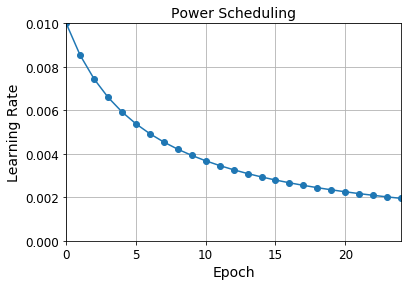

In [89]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)

### Exponential Scheduling

In [90]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [91]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return 0.01 * 0.1**(epoch / 20)
    return exponential_decay_fn

In [92]:
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [93]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",metrics=["accuracy"])
n_epochs = 25

In [94]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data = (X_valid_scaled, y_valid),
                   callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 11s 195us/sample - loss: 0.8752 - accuracy: 0.7495 - val_loss: 1.0824 - val_accuracy: 0.7272
Epoch 2/25
55000/55000 [==============================] - 9s 161us/sample - loss: 0.7023 - accuracy: 0.7925 - val_loss: 0.7765 - val_accuracy: 0.7928
Epoch 3/25
55000/55000 [==============================] - 9s 159us/sample - loss: 0.6247 - accuracy: 0.8185 - val_loss: 0.5898 - val_accuracy: 0.8430
Epoch 4/25
55000/55000 [==============================] - 9s 155us/sample - loss: 0.5551 - accuracy: 0.8347 - val_loss: 0.5674 - val_accuracy: 0.8434
Epoch 5/25
55000/55000 [==============================] - 9s 165us/sample - loss: 0.4950 - accuracy: 0.8494 - val_loss: 0.6558 - val_accuracy: 0.8266
Epoch 6/25
55000/55000 [==============================] - 9s 164us/sample - loss: 0.4511 - accuracy: 0.8616 - val_loss: 0.5053 - val_accuracy: 0.8526
Epoch 7/25
55000/55000 [==========================

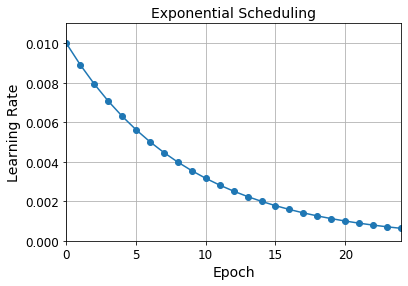

In [96]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [97]:
 def exponential_decay_fn(epoch, lr):
        return lr * 0.1**(1 / 20)

In [99]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s
    
    def on_batch_begin(self, batch, logs=None):
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1 **(1/s))
    
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs["lr"] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer,
             metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[exp_decay])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 11s 193us/sample - loss: 0.8315 - accuracy: 0.7573 - val_loss: 0.6657 - val_accuracy: 0.7800
Epoch 2/25
55000/55000 [==============================] - 9s 162us/sample - loss: 0.6298 - accuracy: 0.8048 - val_loss: 0.5747 - val_accuracy: 0.8224
Epoch 3/25
55000/55000 [==============================] - 9s 162us/sample - loss: 0.5996 - accuracy: 0.8147 - val_loss: 0.6285 - val_accuracy: 0.8188
Epoch 4/25
55000/55000 [==============================] - 9s 161us/sample - loss: 0.5286 - accuracy: 0.8378 - val_loss: 0.7517 - val_accuracy: 0.7698
Epoch 5/25
55000/55000 [==============================] - 9s 163us/sample - loss: 0.4879 - accuracy: 0.8450 - val_loss: 0.4953 - val_accuracy: 0.8602
Epoch 6/25
55000/55000 [==============================] - 9s 162us/sample - loss: 0.4133 - accuracy: 0.8664 - val_loss: 0.5011 - val_accuracy: 0.8594
Epoch 7/25
55000/55000 [==========================

In [101]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1 ** (steps / s)

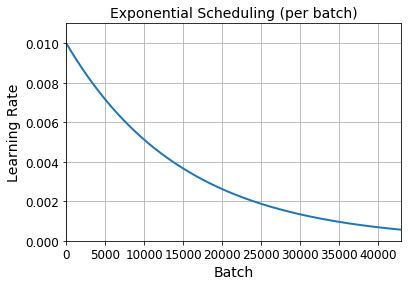

In [102]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling

In [103]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [104]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [105]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data = (X_valid_scaled, y_valid),
                   callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 12s 212us/sample - loss: 0.8709 - accuracy: 0.7511 - val_loss: 0.9215 - val_accuracy: 0.7282
Epoch 2/25
55000/55000 [==============================] - 8s 150us/sample - loss: 0.8818 - accuracy: 0.7119 - val_loss: 0.8219 - val_accuracy: 0.7210
Epoch 3/25
55000/55000 [==============================] - 9s 157us/sample - loss: 1.0412 - accuracy: 0.6704 - val_loss: 0.9328 - val_accuracy: 0.7000
Epoch 4/25
55000/55000 [==============================] - 9s 155us/sample - loss: 0.9790 - accuracy: 0.6821 - val_loss: 0.8541 - val_accuracy: 0.7208
Epoch 5/25
55000/55000 [==============================] - 8s 154us/sample - loss: 1.0371 - accuracy: 0.6762 - val_loss: 1.1603 - val_accuracy: 0.6212
Epoch 6/25
55000/55000 [==============================] - 9s 157us/sample - loss: 0.7492 - accuracy: 0.7103 - val_loss: 0.8779 - val_accuracy: 0.7318
Epoch 7/25
55000/55000 [==========================

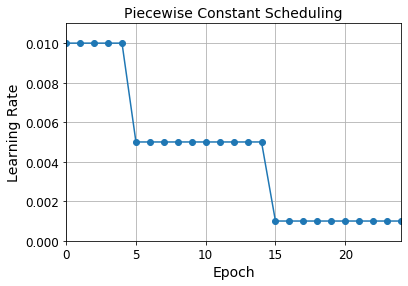

In [107]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [108]:
tf.random.set_seed(42)
np.random.seed(42)

In [109]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 7s 127us/sample - loss: 0.6125 - accuracy: 0.8017 - val_loss: 0.5277 - val_accuracy: 0.8166
Epoch 2/25
55000/55000 [==============================] - 6s 105us/sample - loss: 0.5152 - accuracy: 0.8360 - val_loss: 0.6810 - val_accuracy: 0.8244
Epoch 3/25
55000/55000 [==============================] - 6s 109us/sample - loss: 0.5109 - accuracy: 0.8449 - val_loss: 0.5018 - val_accuracy: 0.8538
Epoch 4/25
55000/55000 [==============================] - 6s 114us/sample - loss: 0.5024 - accuracy: 0.8473 - val_loss: 0.4809 - val_accuracy: 0.8552
Epoch 5/25
55000/55000 [==============================] - 6s 106us/sample - loss: 0.5384 - accuracy: 0.8463 - val_loss: 0.6110 - val_accuracy: 0.8430
Epoch 6/25
55000/55000 [==============================] - 6s 102us/sample - loss: 0.5014 - accuracy: 0.8566 - val_loss: 0.5814 - val_accuracy: 0.8480
Epoch 7/25
55000/55000 [===========================

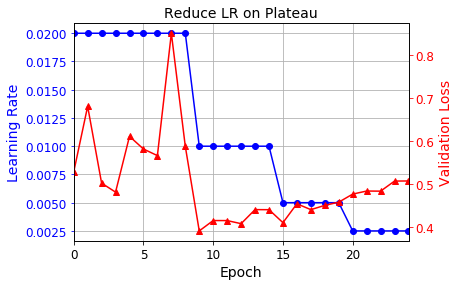

In [110]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras schedulers

In [111]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer,
             metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data = (X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4888 - accuracy: 0.8271 - val_loss: 0.4082 - val_accuracy: 0.8590
Epoch 2/25
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3818 - accuracy: 0.8654 - val_loss: 0.3886 - val_accuracy: 0.8670
Epoch 3/25
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3479 - accuracy: 0.8765 - val_loss: 0.3672 - val_accuracy: 0.8684
Epoch 4/25
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3264 - accuracy: 0.8835 - val_loss: 0.3517 - val_accuracy: 0.8786
Epoch 5/25
55000/55000 [==============================] - 5s 96us/sample - loss: 0.3099 - accuracy: 0.8900 - val_loss: 0.3430 - val_accuracy: 0.8794
Epoch 6/25
55000/55000 [==============================] - 5s 94us/sample - loss: 0.2960 - accuracy: 0.8944 - val_loss: 0.3405 - val_accuracy: 0.8830
Epoch 7/25
55000/55000 [==============================] 

In [112]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries = [5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values = [0.01, 0.005, 0.001]
)

## 1Cycle scheduling

In [127]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size = batch_size,
                       callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses
    
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) /2])
    plt.xlabel('learning rate')
    plt.ylabel("Loss")

In [118]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Train on 55000 samples
55000/55000 [==============================] - 3s 45us/sample - loss: nan - accuracy: 0.3896


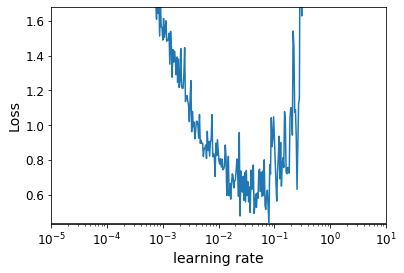

In [128]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [131]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 +1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration- iter1) / (iter2 - iter1)+rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [132]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 3s 48us/sample - loss: 0.6570 - accuracy: 0.7750 - val_loss: 0.4875 - val_accuracy: 0.8300
Epoch 2/25
55000/55000 [==============================] - 2s 45us/sample - loss: 0.4584 - accuracy: 0.8391 - val_loss: 0.4391 - val_accuracy: 0.8478
Epoch 3/25
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4124 - accuracy: 0.8541 - val_loss: 0.4102 - val_accuracy: 0.8574
Epoch 4/25
55000/55000 [==============================] - 2s 43us/sample - loss: 0.3842 - accuracy: 0.8645 - val_loss: 0.3889 - val_accuracy: 0.8656
Epoch 5/25
55000/55000 [==============================] - 2s 43us/sample - loss: 0.3640 - accuracy: 0.8707 - val_loss: 0.3735 - val_accuracy: 0.8678
Epoch 6/25
55000/55000 [==============================] - 2s 43us/sample - loss: 0.3455 - accuracy: 0.8778 - val_loss: 0.3650 - val_accuracy: 0.8726
Epoch 7/25
55000/55000 [==============================] -

# Avoiding Overfitting Through Regularization

## $\ell_1$ and $\ell_2$ regularization

In [133]:
layer = keras.layers.Dense(100, activation="elu",
                          kernel_initializer="he_normal",
                          kernel_regularizer=keras.regularizers.l2(0.01))

In [134]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                      kernel_initializer="he_normal",
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                      kernel_initializer="he_normal",
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                      kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs = n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 12s 221us/sample - loss: 1.5895 - accuracy: 0.8103 - val_loss: 0.7553 - val_accuracy: 0.8096
Epoch 2/2
55000/55000 [==============================] - 9s 162us/sample - loss: 0.7184 - accuracy: 0.8264 - val_loss: 0.7178 - val_accuracy: 0.8222


In [135]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                          activation="elu",
                          kernel_initializer="he_normal",
                          kernel_regularizer=keras.regularizers.l2(0.01))
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
             metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data = (X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 11s 201us/sample - loss: 1.6418 - accuracy: 0.8107 - val_loss: 0.7600 - val_accuracy: 0.8068
Epoch 2/2
55000/55000 [==============================] - 9s 164us/sample - loss: 0.7197 - accuracy: 0.8262 - val_loss: 0.7175 - val_accuracy: 0.8254


# Dropout

In [138]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
             metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 11s 194us/sample - loss: 0.5765 - accuracy: 0.8004 - val_loss: 0.3741 - val_accuracy: 0.8642
Epoch 2/2
55000/55000 [==============================] - 10s 174us/sample - loss: 0.4244 - accuracy: 0.8442 - val_loss: 0.3652 - val_accuracy: 0.8618


# alpha dropout

In [139]:
tf.random.set_seed(42)
np.random.seed(42)

In [140]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 8s 150us/sample - loss: 0.6628 - accuracy: 0.7608 - val_loss: 0.5851 - val_accuracy: 0.8392
Epoch 2/20
55000/55000 [==============================] - 7s 135us/sample - loss: 0.5566 - accuracy: 0.7969 - val_loss: 0.5327 - val_accuracy: 0.8460
Epoch 3/20
55000/55000 [==============================] - 7s 128us/sample - loss: 0.5239 - accuracy: 0.8047 - val_loss: 0.5412 - val_accuracy: 0.8498
Epoch 4/20
55000/55000 [==============================] - 7s 134us/sample - loss: 0.5078 - accuracy: 0.8130 - val_loss: 0.4721 - val_accuracy: 0.8634
Epoch 5/20
55000/55000 [==============================] - 8s 139us/sample - loss: 0.4953 - accuracy: 0.8172 - val_loss: 0.4755 - val_accuracy: 0.8598
Epoch 6/20
55000/55000 [==============================] - 7s 130us/sample - loss: 0.4803 - accuracy: 0.8226 - val_loss: 0.4468 - val_accuracy: 0.8664
Epoch 7/20
55000/55000 [===========================

In [141]:
model.evaluate(X_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4626483374655247, 0.87]

In [142]:
model.evaluate(X_train_scaled, y_train)

55000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3402316115130078, 0.889]

In [143]:
history = model.fit(X_train_scaled, y_train)

Train on 55000 samples
55000/55000 [==============================] - 7s 126us/sample - loss: 0.4182 - accuracy: 0.8432


# MC Dropout

In [144]:
tf.random.set_seed(42)
np.random.seed(42)

In [145]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
print(y_probas.shape)
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(100, 10000, 10)


In [148]:
X_test_scaled.shape

(10000, 28, 28)

In [147]:
y_proba.shape

(10000, 10)

In [149]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [150]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.94]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.24, 0.  , 0.75]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.01, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.44, 0.  , 0.56]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.45, 0.  , 0.55]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.08, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.81]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.43, 0.  , 0.04, 0.  , 0.53]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.16, 0.  , 0.61]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.05, 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.17, 0.  , 0.61]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.39, 0.  , 0

In [151]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.17, 0.  , 0.72]],
      dtype=float32)

In [152]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.21, 0.  , 0.28]],
      dtype=float32)

In [153]:
y_pred = np.argmax(y_proba, axis=1)

In [154]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [155]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8639

In [156]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training = True)

In [157]:
tf.random.set_seed(42)
np.random.seed(42)

In [159]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout)
 else layer for layer in model.layers])

In [160]:
mc_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_266 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_267 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_268 (Dense)            (None, 10)              

In [161]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer,
                metrics=["accuracy"])

In [162]:
mc_model.set_weights(model.get_weights())

In [163]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.2 , 0.  , 0.72]],
      dtype=float32)

# Max Norm

In [167]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                          kernel_constraint=keras.constraints.max_norm(1.))

In [168]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 11s 200us/sample - loss: 0.4757 - accuracy: 0.8324 - val_loss: 0.3667 - val_accuracy: 0.8686
Epoch 2/2
55000/55000 [==============================] - 9s 170us/sample - loss: 0.3565 - accuracy: 0.8692 - val_loss: 0.3658 - val_accuracy: 0.8680
